Assume that the return of a portfolio r is a normal random variable:

$r \sim N(\mu, \sigma^{2}) $

probability density function:

$f(r) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{r - \mu}{\sigma})^{2}}$

cumulative distribution function:

$P(r < r^{*}) = \int_{-\infty}^{r^{*}} f(r) dr$

$= \int_{-\infty}^{r^{*}} \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{r - \mu}{\sigma})^{2}} dr$

$= \frac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{r^{*}} e^{-\frac{1}{2}(\frac{r - \mu}{\sigma})^{2}} dr$

$= \alpha$

substitute standard normal random variable:

$z = \frac{r - \mu} {\sigma}$

$E[z] = E[\frac{r - \mu} {\sigma}] = \frac{1} {\sigma} * E[r] - \frac {\mu} {\sigma} = \frac{\mu} {\sigma} - \frac {\mu} {\sigma} = 0$

$Var[z] = E[(z - E[z])^{2}] = E[z^2] = E[(\frac{r - \mu} {\sigma})^2] = \frac{1} {\sigma^2} E[(r - \mu)^2] = \frac{1} {\sigma^2}Var[r] = \frac{\sigma^2} {\sigma^2} = 1$

$z \sim N(0, 1)$

$f(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^{2}}{2}}$

$P(z < z^{*}) = \int_{-\infty}^{z^{*}} f(z) dz$

$= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{z^{*}} e^{-\frac{z^{2}}{2}} dz$

$= \alpha$, where

$z^{*} = \frac{r^{*} - \mu} {\sigma}$

$r^{*} = \mu + z^{*} * \sigma$

assume that the current portfolio value is $V$, then the value at risk $VaR$ over a period $T$ at $1-\alpha$ confidence level is

$VaR(T, 1-\alpha)$

$ = V * r^{*}$

$ = V * (\mu + z^{*} * \sigma)$
 where

$P(z < z^{*}) = \alpha, z \sim N(0, 1)$

In [1]:
import yfinance as yf
from datetime import datetime
import pandas_datareader.data as pdr
import scipy.stats as stats

yf.pdr_override()
ticker = 'DOGE-USD'
start = datetime.strptime('2021-02-26', '%Y-%m-%d')
end = datetime.strptime('2022-02-26', '%Y-%m-%d')
data = pdr.DataReader(ticker, start, end , data_source='yahoo').dropna()

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-26,0.050138,0.052472,0.048708,0.050480,0.050480,1694323466
2021-02-27,0.050500,0.051920,0.049297,0.050083,0.050083,1286229526
2021-02-28,0.050097,0.050134,0.045088,0.048052,0.048052,1408101260
2021-03-01,0.048070,0.051479,0.048029,0.050599,0.050599,1494427207
2021-03-02,0.050596,0.052382,0.049299,0.050262,0.050262,1346282318


current price = 0.12764699757099152
portfolio value = 12764.699757099152
z* = -1.6448536269514729
mean = 0.0065964957558367985
std = 0.09696501908722127
VaR = -1951.6813319539037


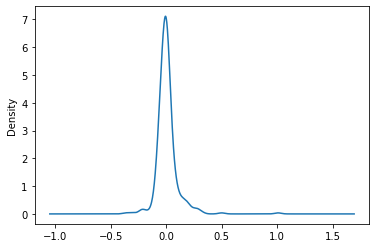

In [2]:
alpha = 0.05
num_shares = 100000
on_date = '2022-02-26'
share_price = data['Adj Close'][on_date]
portfolio_value = share_price * num_shares

z_value = stats.norm.ppf(alpha)
daily_return = data['Adj Close'].pct_change(1).dropna()
mean_return = daily_return.mean()
std_return = daily_return.std()

VaR = portfolio_value * (mean_return + z_value * std_return) 

daily_return.plot(kind='kde')

print("current price = {0}".format(share_price))
print("portfolio value = {0}".format(portfolio_value))
print("z* = {0}".format(z_value))
print("mean = {0}".format(mean_return))
print("std = {0}".format(std_return))
print("VaR = {0}".format(VaR))

In [3]:
print("Current portfolio value for {0} shares of {1} (${2} per share) on {3}: ${4}"\
      .format(num_shares, ticker, round(share_price, 2), on_date, round(portfolio_value, 2)))
print("{0}% annual value at risk: On {1}% of trading days, the portfolio of {2} shares \
of {3} stock on {4} would be expected to incur a loss of at least ${5}"\
      .format(alpha*100, alpha*100, num_shares, ticker, on_date, round(VaR,2)))

Current portfolio value for 100000 shares of DOGE-USD ($0.13 per share) on 2022-02-26: $12764.7
5.0% annual value at risk: On 5.0% of trading days, the portfolio of 100000 shares of DOGE-USD stock on 2022-02-26 would be expected to incur a loss of at least $-1951.68
